In [1]:
import math, scipy
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.read_excel('./UN.xlsx', sheet_name=None)

{'CONTENTS':                                            Unnamed: 0  \
 0                                                 NaN   
 1                                                 NaN   
 2                                                 NaN   
 3                                      United Nations   
 4                                 Population Division   
 5           Department of Economic and Social Affairs   
 6                                                 NaN   
 7   Trends in International Migrant Stock: The 201...   
 8                                   TABLE OF CONTENTS   
 9                           POP/DB/MIG/Stock/Rev.2015   
 10  December 2015 - Copyright © 2015 by United Nat...   
 11  Suggested citation: United Nations, Department...   
 12  Trends in International Migrant Stock: The 201...   
 13                                                NaN   
 14                                              TABLE   
 15                                            Table 1   
 1

In [4]:
#import original messy Table 1 and delete extra rows without data
#Total means sum of female+male data
col_names = ['Major Area, Region, Country or Area of Destination','Notes','Country Code',
              'Type of Data','1990 Total', '1995 Total', '2000 Total','2005 Total', '2010 Total', '2015 Total','1990 Male', '1995 Male', '2000 Male','2005 Male', '2010 Male',
              '2015 Male','1990 Female', '1995 Female', '2000 Female','2005 Female', '2010 Female','2015 Female']
df2=pd.read_excel('UN.xlsx', sheet_name= 'Table 1',skiprows=16,header=None,usecols=list(range(1,23)),names=col_names)
df2.head(10)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   
5                                 Sub-Saharan Africa   (e)           947   
6                                             Africa   NaN           903   
7                                     Eastern Africa   NaN           910   
8                                            Burundi   NaN           108   
9                                            Comoros   NaN           174   

  Type of Data 1990 Total 1995 Total 2000 Total 2005 Total  2010 Total  \
0          NaN  152563212  160801752  172703309  191269100   221714243   
1          NaN   82378628   92306854  103375363  117181109   132560325   
2          NaN   70184584   68494898   69327946   74087991    89153918   
3          NaN   11075966   11711703   10077824    9809634    10018128   
4          NaN   59105261   56778501   59244124   64272611    79130668   
5          NaN   14690319   15324570   13716539   13951086    15496764   
6          NaN   15690623   16352814   14800306   15191146    16840014   
7          NaN    5964031    5022742    4844795    4745792     4657063   
8          B R     333110     254853     125628     172874      235259   
9            B      14079      13939      13799      13209       12618   

   2015 Total  ... 2000 Male 2005 Male  2010 Male  2015 Male  1990 Female  \
0   243700236  ...  87884839  97866674  114613714  126115435     74815702   
1   140481955  ...  50536796  57217777   64081077   67618619     42115231   
2   103218281  ...  37348043  40648897   50532637   58496816     32700471   
3    11951316  ...   5361902   5383009    5462714    6463217      5236216   
4    91262036  ...  31986141  35265888   45069923   52033599     27464255   
5    18993986  ...   7210452   7444048    8188581   10099486      6945013   
6    20649557  ...   7856358   8231437    9039314   11123423      7411059   
7     6129113  ...   2480584   2529460    2366216    3109176      2892842   
8      286810  ...     61094     84805     115823     141311       169843   
9       12555  ...      6511      6286       6060       6071         7362   

   1995 Female 2000 Female 2005 Female 2010 Female 2015 Female  
0     79064275    84818470    93402426   107100529   117584801  
1     47214055    52838567    59963332    68479248    72863336  
2     31850220    31979903    33439094    38621281    44721465  
3      5573685     4721920     4432371     4560536     5493028  
4     26276535    27257983    29006723    34060745    39228437  
5      7287746     6506087     6507038     7308183     8894500  
6      7735883     6943948     6959709     7800700     9526134  
7      2437689     2364211     2216332     2290847     3019937  
8       130688       64534       88069      119436      145499  
9         7325        7288        6923        6558        6484  

[10 rows x 22 columns]

In [5]:
#make new columns for year, male female, total, and International migrant stock at mid-year data
df3=pd.melt(df2,id_vars=['Major Area, Region, Country or Area of Destination',
                         'Notes','Country Code','Type of Data'],value_name='Migrant Stock')
df3.head(5)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data    variable Migrant Stock  
0          NaN  1990 Total     152563212  
1          NaN  1990 Total      82378628  
2          NaN  1990 Total      70184584  
3          NaN  1990 Total      11075966  
4          NaN  1990 Total      59105261

In [6]:
#Make year column
df3['Year'] = df3['variable'].str[0:4]


In [7]:
#make column with female, male and total 
df3['combo'] = df3['variable'].str[5:]
df3['combo'].head()

0    Total
1    Total
2    Total
3    Total
4    Total
Name: combo, dtype: object

In [8]:
df3[df3['Country Code']>901]

Major Area, Region, Country or Area of Destination Notes  Country Code  \
2                                    Developing regions   (c)           902   
3                             Least developed countries   (d)           941   
4     Less developed regions excluding least develop...   NaN           934   
5                                    Sub-Saharan Africa   (e)           947   
6                                                Africa   NaN           903   
...                                                 ...   ...           ...   
4742                                            Oceania   NaN           909   
4743                          Australia and New Zealand   NaN           927   
4746                                          Melanesia   NaN           928   
4752                                         Micronesia   NaN           954   
4760                                          Polynesia   NaN           957   

     Type of Data     variable Migrant Stock  Year   combo  
2             NaN   1990 Total      70184584  1990   Total  
3             NaN   1990 Total      11075966  1990   Total  
4             NaN   1990 Total      59105261  1990   Total  
5             NaN   1990 Total      14690319  1990   Total  
6             NaN   1990 Total      15690623  1990   Total  
...           ...          ...           ...   ...     ...  
4742          NaN  2015 Female       4101334  2015  Female  
4743          NaN  2015 Female       3963032  2015  Female  
4746          NaN  2015 Female         47782  2015  Female  
4752          NaN  2015 Female         57159  2015  Female  
4760          NaN  2015 Female         33361  2015  Female  

[558 rows x 8 columns]

In [9]:
#Cleaned Table Table 1- International migrant stock at mid-year by sex and by major area,
#region, country or area, 1990-2015
    ##contains column for female, male and Total(both sexes)
    
final_table= pd.pivot(df3,index=['Major Area, Region, Country or Area of Destination','Notes','Country Code',
'Type of Data','Year'],columns='combo',values='Migrant Stock').reset_index().rename_axis(None,axis=1)

final_table.rename(columns={'Total': 'Total',
                            'Male': 'Male',
                            'Female': 'Female'}
                   , inplace=True)

final_table.head(15
                  
                 )


Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                         Afghanistan   NaN             4   
1                                         Afghanistan   NaN             4   
2                                         Afghanistan   NaN             4   
3                                         Afghanistan   NaN             4   
4                                         Afghanistan   NaN             4   
5                                         Afghanistan   NaN             4   
6                                              Africa   NaN           903   
7                                              Africa   NaN           903   
8                                              Africa   NaN           903   
9                                              Africa   NaN           903   
10                                             Africa   NaN           903   
11                                             Africa   NaN           903   
12                                            Albania   NaN             8   
13                                            Albania   NaN             8   
14                                            Albania   NaN             8   

   Type of Data  Year   Female      Male     Total  
0             B  1990    25128     32558     57686  
1             B  1995    32417     39105     71522  
2             B  2000    33069     42848     75917  
3             B  2005    38026     49274     87300  
4             B  2010    44537     57709    102246  
5             B  2015   188920    193445    382365  
6           NaN  1990  7411059   8279564  15690623  
7           NaN  1995  7735883   8616931  16352814  
8           NaN  2000  6943948   7856358  14800306  
9           NaN  2005  6959709   8231437  15191146  
10          NaN  2010  7800700   9039314  16840014  
11          NaN  2015  9526134  11123423  20649557  
12            B  1990    35434     30579     66013  
13            B  1995    38070     33284     71354  
14            B  2000    40705     35990     76695

In [10]:
final_table[final_table['Country Code']>901]

Major Area, Region, Country or Area of Destination Notes  Country Code  \
6                                                Africa   NaN           903   
7                                                Africa   NaN           903   
8                                                Africa   NaN           903   
9                                                Africa   NaN           903   
10                                               Africa   NaN           903   
...                                                 ...   ...           ...   
1561                                     Western Europe   NaN           926   
1562                                     Western Europe   NaN           926   
1563                                     Western Europe   NaN           926   
1564                                     Western Europe   NaN           926   
1565                                     Western Europe   NaN           926   

     Type of Data  Year    Female      Male     Total  
6             NaN  1990   7411059   8279564  15690623  
7             NaN  1995   7735883   8616931  16352814  
8             NaN  2000   6943948   7856358  14800306  
9             NaN  2005   6959709   8231437  15191146  
10            NaN  2010   7800700   9039314  16840014  
...           ...   ...       ...       ...       ...  
1561          NaN  1995   8965592   9352448  18318040  
1562          NaN  2000  10212028  10213350  20425378  
1563          NaN  2005  11613877  11162407  22776284  
1564          NaN  2010  13151376  12093939  25245315  
1565          NaN  2015  14172845  13209625  27382470  

[186 rows x 8 columns]

In [11]:
#Final 

In [12]:
#Remove Nan vals


In [13]:
final_table=final_table[final_table['Female']!='..']

In [14]:
final_table['Female'] = final_table['Female'].astype(int)

In [15]:
list(final_table['Female'].unique())[-10:]

[157547, 124196, 73862, 63403, 274793, 185214, 176198, 168723, 170924, 171487]

In [16]:
#Sort value and year
final_table.sort_values(by=["Country Code","Year"])

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                           Afghanistan   NaN             4   
1                                           Afghanistan   NaN             4   
2                                           Afghanistan   NaN             4   
3                                           Afghanistan   NaN             4   
4                                           Afghanistan   NaN             4   
...                                                 ...   ...           ...   
1315                                      Southern Asia   NaN          5501   
1316                                      Southern Asia   NaN          5501   
1317                                      Southern Asia   NaN          5501   
1318                                      Southern Asia   NaN          5501   
1319                                      Southern Asia   NaN          5501   

     Type of Data  Year   Female     Male     Total  
0               B  1990    25128    32558     57686  
1               B  1995    32417    39105     71522  
2               B  2000    33069    42848     75917  
3               B  2005    38026    49274     87300  
4               B  2010    44537    57709    102246  
...           ...   ...      ...      ...       ...  
1315          NaN  1995  6960721  8382298  15343019  
1316          NaN  2000  6863410  8414610  15278020  
1317          NaN  2005  6184171  7537840  13722011  
1318          NaN  2010  6372945  7953646  14326591  
1319          NaN  2015  6404302  7699380  14103682  

[1575 rows x 8 columns]

In [17]:
final_table=final_table.sort_values(by=["Country Code","Year"])

In [18]:
#select countries by development
df_by_development = final_table[final_table['Country Code'].isin([901,902])]

In [19]:
import matplotlib.pyplot as plt

In [20]:
df_by_development

Major Area, Region, Country or Area of Destination Notes  Country Code  \
396                                  Developed regions   (b)           901   
397                                  Developed regions   (b)           901   
398                                  Developed regions   (b)           901   
399                                  Developed regions   (b)           901   
400                                  Developed regions   (b)           901   
401                                  Developed regions   (b)           901   
402                                 Developing regions   (c)           902   
403                                 Developing regions   (c)           902   
404                                 Developing regions   (c)           902   
405                                 Developing regions   (c)           902   
406                                 Developing regions   (c)           902   
407                                 Developing regions   (c)           902   

    Type of Data  Year    Female      Male      Total  
396          NaN  1990  42115231  40263397   82378628  
397          NaN  1995  47214055  45092799   92306854  
398          NaN  2000  52838567  50536796  103375363  
399          NaN  2005  59963332  57217777  117181109  
400          NaN  2010  68479248  64081077  132560325  
401          NaN  2015  72863336  67618619  140481955  
402          NaN  1990  32700471  37484113   70184584  
403          NaN  1995  31850220  36644678   68494898  
404          NaN  2000  31979903  37348043   69327946  
405          NaN  2005  33439094  40648897   74087991  
406          NaN  2010  38621281  50532637   89153918  
407          NaN  2015  44721465  58496816  103218281

In [21]:
final_table[final_table['Country Code']>901]

Major Area, Region, Country or Area of Destination Notes  Country Code  \
402                                  Developing regions   (c)           902   
403                                  Developing regions   (c)           902   
404                                  Developing regions   (c)           902   
405                                  Developing regions   (c)           902   
406                                  Developing regions   (c)           902   
...                                                 ...   ...           ...   
1315                                      Southern Asia   NaN          5501   
1316                                      Southern Asia   NaN          5501   
1317                                      Southern Asia   NaN          5501   
1318                                      Southern Asia   NaN          5501   
1319                                      Southern Asia   NaN          5501   

     Type of Data  Year    Female      Male     Total  
402           NaN  1990  32700471  37484113  70184584  
403           NaN  1995  31850220  36644678  68494898  
404           NaN  2000  31979903  37348043  69327946  
405           NaN  2005  33439094  40648897  74087991  
406           NaN  2010  38621281  50532637  89153918  
...           ...   ...       ...       ...       ...  
1315          NaN  1995   6960721   8382298  15343019  
1316          NaN  2000   6863410   8414610  15278020  
1317          NaN  2005   6184171   7537840  13722011  
1318          NaN  2010   6372945   7953646  14326591  
1319          NaN  2015   6404302   7699380  14103682  

[186 rows x 8 columns]

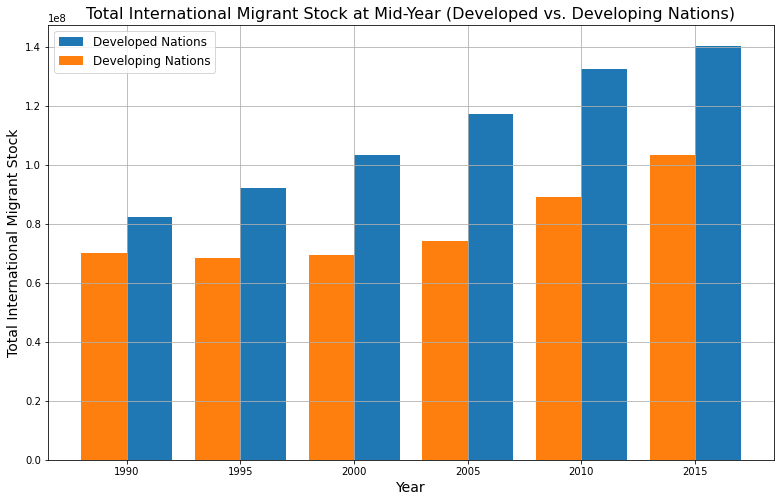

In [58]:
#create developed vs developing graph
# create a figure and axis
fig, ax = plt.subplots()

# scatter region and year
x = df_by_development['Year'][:6].astype(int)
y1 = df_by_development[df_by_development['Country Code']==901]['Total'].values
y2 = df_by_development[df_by_development['Country Code']==902]['Total'].values
w = 1
rects1 = ax.bar(x+w, y1, width = 2, color='tab:blue', align='center')
rects2 = ax.bar(x-w, y2,  width = 2, color='tab:orange', align='center')

fig.set_size_inches(13,8)



#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
ax.grid(True)
ax.set_title('Total International Migrant Stock at Mid-Year (Developed vs. Developing Nations)',fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total International Migrant Stock', fontsize=14)
ax.legend( (rects1[3], rects2[4]), ('Developed Nations', 'Developing Nations'), fontsize=12 )



In [23]:
#select data by region
df_by_region= pd.pivot(df3,index=['Major Area, Region, Country or Area of Destination','Notes','Country Code',
'Type of Data','Year'],columns='combo',values='Migrant Stock').reset_index().rename_axis(None,axis=1)


df_by_region.rename(columns={'Total': 'Total international migrant stock (both sexes)',
                            'Male': 'Male international migrant stock',
                            'Female': 'Female international migrant stock'}
                   , inplace=True)
#final_table.drop(columns=['Major Area, Region, Country or Area of Destination'],inplace=True)

df_by_region.head(5)
df_by_region.columns=['Area','Notes','Country Code', 'DataType', 'Year', 'Female', 'Male', 'Total']

In [24]:
df_by_region =final_table[final_table['Country Code'].isin([903,935,908,909,904, 905])]

In [25]:
df_by_region.head()

Major Area, Region, Country or Area of Destination Notes  Country Code  \
6                                              Africa   NaN           903   
7                                              Africa   NaN           903   
8                                              Africa   NaN           903   
9                                              Africa   NaN           903   
10                                             Africa   NaN           903   

   Type of Data  Year   Female     Male     Total  
6           NaN  1990  7411059  8279564  15690623  
7           NaN  1995  7735883  8616931  16352814  
8           NaN  2000  6943948  7856358  14800306  
9           NaN  2005  6959709  8231437  15191146  
10          NaN  2010  7800700  9039314  16840014

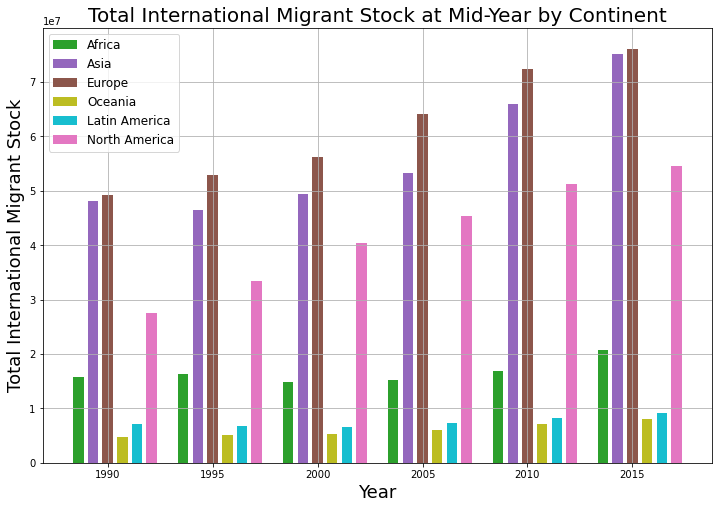

In [62]:
#create continent graph
# create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# scatter male against female
x = df_by_region['Year'][:6].astype(int)
#903,935,908,909,904, 905
y_africa = df_by_region[df_by_region['Country Code']==903]['Total'].values
y_asia = df_by_region[df_by_region['Country Code']==935]['Total'].values
y_europe = df_by_region[df_by_region['Country Code']==908]['Total'].values
y_oceanian = df_by_region[df_by_region['Country Code']==909]['Total'].values
y_latin = df_by_region[df_by_region['Country Code']==904]['Total'].values
y_north_america = df_by_region[df_by_region['Country Code']==905]['Total'].values
w = 0.7
rects1 = ax.bar(x-2*w, y_africa, width = 0.5, color='tab:green', align='center')
rects2 = ax.bar(x-w, y_asia,  width = 0.5, color='tab:purple', align='center')
rects3 = ax.bar(x, y_europe, width = 0.5, color='tab:brown', align='center')
rects4 = ax.bar(x+1*w, y_oceanian,  width = 0.5, color='tab:olive', align='center')
rects5 = ax.bar(x+2*w, y_latin, width = 0.5, color='tab:cyan', align='center')
rects6 = ax.bar(x+3*w, y_north_america,  width = 0.5, color='tab:pink', align='center')

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
fig.set_size_inches(12, 8)
ax.grid(True)
ax.set_title('Total International Migrant Stock at Mid-Year by Continent', fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Total International Migrant Stock', fontsize=18)
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]), 
          ('Africa', 'Asia','Europe','Oceania', 'Latin America', 'North America'), fontsize=12 )